# Development Notebook for extracting icebergs from DEMs

by Jessica Scheick

Workflow based on previous methods and code developed by JScheick for Scheick et al 2019 *Remote Sensing*.

***Important note about CRS handling*** This code was developed while also learning about Xarray, rioxarray, rasterio, and other Python geospatial libraries. Since projections are not yet fully handled [smoothly] in any of those resources, and especially not integrated, there's little to no built in checking or handling of CRS. Instead, handling is done manually throughout the code and external to this notebook. This is critical to know because the CRS displayed by a rioxarray dataset may be from one variable added to the dataset, but is not necessarily the original (or read in) CRS for each variable in the dataset (hence the manual, external handling). The `get_mask` and `get_new_var_from_file` methods should reproject new data sources before adding them to the dataset.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
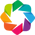

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
%matplotlib inline
import hvplot.xarray
# import hvplot.pandas
import holoviews as hv
hv.extension('bokeh','matplotlib')
from holoviews import dim, opts
import datetime as dt
import os
import panel as pn
pn.extension()
import pyproj
import rioxarray

In [3]:
%load_ext autoreload
# from icebath.core import berggdf as bdf
import icebath as icebath
from icebath.core import build_xrds
from icebath.utils import raster_ops as raster_ops
from icebath.utils import vector_ops as vector_ops
from icebath.core import fl_ice_calcs as icalcs
from icebath.core import build_gdf
%autoreload 2

In [1]:
# laptop dask setup (updated?)
import dask
from dask.distributed import Client, LocalCluster
# cluster=LocalCluster()
# client = Client(cluster) #, processes=False) this flag only works if you're not using a LocalCluster, in which case don't use `cluster` either
client = Client(processes=False) #n_workers=2, threads_per_work=3, memory_limit='1GB')
client

# Dask docs of interest
# includes notes and tips on threads vs processes: https://docs.dask.org/en/latest/best-practices.html#best-practices

<Client: 'inproc://192.168.1.9/42102/1' processes=1 threads=12, memory=17.18 GB>

In [5]:
# Pangeo dask setup
from dask_gateway import GatewayCluster

cluster = GatewayCluster()
# options = cluster.gateway.cluster_options()
# options
# cluster.adapt(minimum=2, maximum=10)  # or cluster.scale(n) to a fixed size.
client = cluster.get_client()
client

ModuleNotFoundError: No module named 'dask_gateway'

In [ ]:
# reconnect to existing cluster
from dask_gateway import Gateway
g = Gateway()
g.list_clusters()
cluster = g.connect(g.list_clusters()[0].name)
cluster
cluster.scale(0)
client = cluster.get_client()

In [ ]:
cluster.scale(5)

In [ ]:
client

In [ ]:
client.get_versions(check=True)

In [ ]:
cluster.close()

## Read in DEMs and apply corrections (tidal, geoid)

In [4]:
#Ilulissat Isfjord Mouth, resampled to 50m using CHANGES
# ds = build_xrds.xrds_from_dir('/home/jovyan/icebath/notebooks/supporting_docs/Elevation/ArcticDEM/Regridded_50m_tiles/n69w052/', fjord="JI")

# Ilulissat Isfjord Mouth, original 2m (the files from CHANGES seem much smaller than those from Kane/Pennell. 
# data = xr.open_rasterio('/home/jovyan/icebath/notebooks/supporting_docs/Elevation/ArcticDEM/2m_tiles/n69w052/SETSM_W1W1_20100813_102001000E959700_102001000ECB6B00_seg1_2m_v3.0_dem.tif')
ds = build_xrds.xrds_from_dir('/Users/jessica/projects/bathymetry_from_bergs/DEMs/2m/', fjord="JI")
# ds = build_xrds.xrds_from_dir('/Users/jessica/projects/bathymetry_from_bergs/DEMs/Kane/', fjord="KB", metastr="_meta")
# ds = build_xrds.xrds_from_dir('/home/jovyan/icebath/notebooks/supporting_docs/Elevation/ArcticDEM/2m_tiles/', fjord="JI")

/Users/jessica/projects/bathymetry_from_bergs/github/icebath/icebath/core/build_xrds.py:20: UserWarning: This function currently assumes a constant grid and EPSG for all input files
  warnings.warn("This function currently assumes a constant grid and EPSG for all input files")


SETSM_W1W2_20100814_102001000ECB6B00_1030010006220900_seg1_2m_v3.0_dem.tif
SETSM_WV02_20160903_103001005B81C700_103001005C44F300_seg1_2m_v3.0_dem.tif
SETSM_GE01_20120629_1050410000D4F700_1050410000C40800_seg1_2m_v3.0_dem.tif
Please note the transform is computed assuming a coordinate reference system where x(min) is west and y(min) is south


In [5]:
scrolldem = ds['elevation'].hvplot.image(x='x', y='y',datashade=False, rasterize=True, aspect='equal', cmap='magma', dynamic=True,
                       xlabel="x (km)", ylabel="y (km)", colorbar=True) #turn off datashade to see hover values + colorbar
scrolldem

:DynamicMap   [dtime]
   :Image   [x,y]   (elevation)

### Get and Apply Land Mask
**Note: requires a shapefile of the land areas in the ROI**

The default is to use a shapefile of Greenland: `shpfile='/home/jovyan/icebath/notebooks/supporting_docs/Land_region.shp'`, but an alternative file can be specified.

Underlying code is based on: https://gis.stackexchange.com/questions/357490/mask-xarray-dataset-using-a-shapefile
Other results used rioxarray (which isn't on my current working environment), and my previous work did it all manually with gdal.

In [6]:
# ds.bergxr.get_mask(req_dim=['x','y'], req_vars=None, name='land_mask')
ds.bergxr.get_mask(req_dim=['x','y'], req_vars=None, name='land_mask', 
#                    shpfile='/home/jovyan/icebath/notebooks/supporting_docs/Land_region.shp')
                 shpfile='/Users/jessica/mapping/shpfiles/Greenland/Land_region/Land_region.shp')
# ds.land_mask.plot()
ds['elevation'] = ds['elevation'].where(ds.land_mask == True)

### Apply Geoid Correction
ArcticDEMs come as ellipsoidal height. They are corrected to geoidal height according to geoid_ht = ellipsoid - geoid_offset where geoid_offset is taken from BedMachine v3 and resampled in Xarray (using default "linear" interpolation for multidimensional arrays) to the resolution and extent of the region's dataset.

In [7]:
ds = ds.bergxr.to_geoid(source='/Users/jessica/mapping/datasets/160281892/BedMachineGreenland-2017-09-20_3413_'+ds.attrs['fjord']+'.nc')
# ds = ds.bergxr.to_geoid(source='/home/jovyan/icebath/notebooks/supporting_docs/160281892/BedMachineGreenland-2017-09-20_'+ds.attrs['fjord']+'.nc')

Note that the new file is reprojected to have the same CRS as the dataset to which it is being added.        However, if the two CRSs are compatible, the spatial properties of the new file may be added to or overwrite the ones of the existing dataset


### Apply Tidal Correction

Uses Tyler Sutterly's pyTMD library

In [8]:
# model_path='/home/jovyan/pyTMD/models'
model_path='/Users/jessica/computing/tidal_model_files'
ds=ds.bergxr.tidal_corr(loc=[ds.attrs["fjord"]], model_path=model_path)

Note that tide model and epsg are hard coded in!
They can also be provided as keywords if the wrapper function is updated to handle them


In [ ]:
# # test to make sure that if you already have a tidal correction it won't reapply it, and test that it will return the tides if you don't have an elevation entered
# ds=ds.bergxr.tidal_corr(loc=["JI"])
# ds=ds.bergxr.tidal_corr(loc=["JI"]) # results in assertion error

# ds.attrs['offset_names'] = ('random')
# ds=ds.bergxr.tidal_corr(loc=["JI"]) # results in longer attribute list

In [ ]:
# # go directly to icalcs function, called under the hood above, if you want to see plots
# tides = icalcs.predict_tides(loc='JI',img_time=ds.dtime.values[0], model_path='/home/jovyan/pyTMD/models',
#                     model='AOTIM-5-2018', epsg=3413, plot=True)
# tides[2]

In [14]:
ds=ds.chunk({'dtime': 4, 'x':500, 'y':500})

In [17]:
ds

<xarray.Dataset>
Dimensions:       (dtime: 3, x: 13145, y: 11993)
Coordinates:
  * x             (x) float64 -2.518e+05 -2.518e+05 ... -2.255e+05 -2.255e+05
  * y             (y) float64 -2.273e+06 -2.273e+06 ... -2.249e+06 -2.249e+06
  * dtime         (dtime) datetime64[ns] 2010-08-14T15:35:06 ... 2012-06-29T1...
    land_mask     (y, x) bool True True True True ... False False False False
    mapping       int64 0
Data variables:
    elevation     (dtime, y, x) float32 dask.array<chunksize=(1, 5000, 5000), meta=np.ndarray>
    geoid         (dtime, y, x) int16 dask.array<chunksize=(1, 5000, 5000), meta=np.ndarray>
    tidal_corr    (dtime) float64 0.7383 0.2652 -0.9889
    min_tidal_ht  (dtime) float64 -1.039 -0.9802 -1.036
    max_tidal_ht  (dtime) float64 0.8878 1.002 1.064
Attributes:
    transform:      | 2.00, 0.00,-251822.00|\n| 0.00,-2.00,-2248848.00|\n| 0....
    crs:            +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0...
    res:            (2.0, 2.0)
    is_tiled:       1
    nodatavals:     (-9999.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    fjord:          JI
    offset_names:   ['geoid_offset', 'tidal_corr']

## Extract Icebergs from DEM and put into Geodataframe

Completely automated iceberg delineation in the presence of clouds and/or data gaps (as is common in a DEM) is not yet easily implemented with existing methods. Many techniques have been refined for specific fjords or types of situations. Here, we tailor our iceberg detection towards icebergs that will provide reliable water depth estimates. The following filters are applied during the iceberg extraction process:
 - a minimum iceberg horizontal area is specified on a per-fjord basis. These minima are based on icebergs used to infer bathymetry in previous work (Scheick et al 2019).
 - a maximum allowed height for the median freeboard is specified on a per-fjord basis. These maxima are determined as 10% of the [largest] grounded ice thickness for the source glaciers. While the freeboard values from the DEM are later filtered to remove outliers in determining water depth, this filtering step during the delineation process removes "icebergs" where low clouds, rather than icebergs, are the surface represented in the DEM.
 - a maximum iceberg horizontal area of 1000000 m2 (1km2) is assumed to eliminate large clusters of icebergs, melange, and/or cloud picked up by the delineation algorithm.
 - the median freeboard must be greater than 15 m relative to [adjusted] sea level. If not, we can assume the iceberg is either a false positive (e.g. cloud or sea ice) or too small to provide a meaningful water depth estimate.


***Potential improvement***
This function uses each chunked elevation dataset and computes the per-block arrays. Then it brings the full labeled array into memory to generate polygons with rasterio. Could parallelize this by doing the polygon generation blockwise and then merging the shapefiles (so any polygons that span a block boundary should be joined). Also, turn the workhorse function in build_gdf into multiple functions.

<class 'dask.array.core.Array'>
Got labeled raster of potential icebergs for an image
0
14
about to get the list of possible bergs
AxesSubplot(0.125,0.344551;0.775x0.315898)
6
<class 'list'>
6
(-244014.0, -2266792.0, -243570.0, -2266428.0)
<xarray.DataArray 'elevation' (y: 202, x: 242)>
dask.array<getitem, shape=(202, 242), dtype=float32, chunksize=(202, 242), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.44e+05 -2.44e+05 ... -2.436e+05 -2.436e+05
  * y          (y) float64 -2.267e+06 -2.267e+06 ... -2.266e+06 -2.266e+06
    dtime      datetime64[ns] 2010-08-14T15:35:06
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-243974 -2266723.336547797, -243974 -2266722, -243974.09631 -2266720.03966, -243974.38429 -2266718.09819, -243974.86119 -2266716.19431, -243975.52241 -2266714.34633, -243976.36157 -2266712.57207

[nan nan nan ... nan nan nan]
[19.41371219 19.16988055 18.93739764 ... 23.8818442  24.80462329
 20.41568057]
6.527096432210167
(-239748.0, -2267900.0, -239324.0, -2267654.0)
<xarray.DataArray 'elevation' (y: 143, x: 232)>
dask.array<getitem, shape=(143, 232), dtype=float32, chunksize=(143, 232), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.398e+05 -2.398e+05 ... -2.393e+05 -2.393e+05
  * y          (y) float64 -2.268e+06 -2.268e+06 ... -2.268e+06 -2.268e+06
    dtime      datetime64[ns] 2010-08-14T15:35:06
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-239659.6862114061 -2267842, -239660.0363731735 -2267841.259642956, -239660.09631 -2267840.03966, -239660.38429 -2267838.09819, -239660.86119 -2267836.19431, -239661.52241 -2267834.34633, -239662.36157 -2267832.57207, -239663.37061 -2267830.8886, -239664.539

[        nan         nan         nan ...         nan 13.8494498
 14.11485736]
[17.50267093 18.00285022 18.8649985  ... 12.81854312 13.8494498
 14.11485736]
6.826959293843468
(-229856.0, -2268486.0, -229584.0, -2268174.0)
<xarray.DataArray 'elevation' (y: 176, x: 156)>
dask.array<getitem, shape=(176, 156), dtype=float32, chunksize=(176, 156), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.299e+05 -2.299e+05 ... -2.296e+05 -2.296e+05
  * y          (y) float64 -2.269e+06 -2.269e+06 ... -2.268e+06 -2.268e+06
    dtime      datetime64[ns] 2010-08-14T15:35:06
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-229826 -2268428.102192804, -229826.03966 -2268428.09631, -229828 -2268428, -229834.1021928036 -2268428, -229834.09631 -2268427.96034, -229834.0363731735 -2268426.740357044, -229833.52241 -2268425.65367, -229833

[nan nan nan ... nan nan nan]
[16.87956683 19.53872363 19.37534015 ... 13.89997546 14.24621646
 13.65720431]
7.060341518880089
(-245062.0, -2268516.0, -244578.0, -2268090.0)
<xarray.DataArray 'elevation' (y: 233, x: 262)>
dask.array<getitem, shape=(233, 262), dtype=float32, chunksize=(233, 262), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.451e+05 -2.451e+05 ... -2.446e+05 -2.446e+05
  * y          (y) float64 -2.269e+06 -2.269e+06 ... -2.268e+06 -2.268e+06
    dtime      datetime64[ns] 2010-08-14T15:35:06
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-245020.8043651645 -2268491, -245019.85786 -2268490.14214, -245018.53979 -2268488.68787, -245017.37061 -2268487.1114, -245016.36157 -2268485.42793, -245015.52241 -2268483.65367, -245014.86119 -2268481.80569, -245014.38429 -2268479.90181, -245014.09631 -22684

[11.90114276         nan         nan ...         nan         nan
         nan]
[11.90114276 11.80260531 12.09966342 ... 12.53928058 12.41170565
 12.21638553]
6.495206516743859
(-242676.0, -2268810.0, -242390.0, -2268482.0)
<xarray.DataArray 'elevation' (y: 184, x: 163)>
dask.array<getitem, shape=(184, 163), dtype=float32, chunksize=(184, 163), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.427e+05 -2.427e+05 ... -2.424e+05 -2.424e+05
  * y          (y) float64 -2.269e+06 -2.269e+06 ... -2.268e+06 -2.268e+06
    dtime      datetime64[ns] 2010-08-14T15:35:06
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-242656 -2268511.069284541, -242655.80569 -2268511.13881, -242653.90181 -2268511.61571, -242651.96034 -2268511.90369, -242650 -2268512, -242628.6634522029 -2268512, -242627.65367 -2268512.47759, -242625.80569 

[nan nan nan ... nan nan nan]
[13.67594973 13.76856677 13.47505633 ... 25.50512759 26.08578936
 26.57948367]
7.485033672810753
border too complex. Removing...
4
Generated geodataframe of icebergs for this image
<class 'dask.array.core.Array'>
Got labeled raster of potential icebergs for an image
0
40
about to get the list of possible bergs
AxesSubplot(0.235387,0.125;0.554226x0.755)
57
<class 'list'>
57
tried to trim down a multipolygon
(-242478.0, -2257904.0, -242114.0, -2257408.0)
<xarray.DataArray 'elevation' (y: 268, x: 202)>
dask.array<getitem, shape=(268, 202), dtype=float32, chunksize=(268, 202), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.425e+05 -2.425e+05 ... -2.421e+05 -2.421e+05
  * y          (y) float64 -2.258e+06 -2.258e+06 ... -2.257e+06 -2.257e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 

[nan nan nan ... nan nan nan]
[23.33817142 23.2674393  23.66954654 ... 14.22278446 14.18039935
 14.02488559]
7.619469102267327
invalid buffered inner-berg geometry
tried to trim down a multipolygon
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
(-244512.0, -2266070.0, -243850.0, -2265578.0)
<xarray.DataArray 'elevation' (y: 266, x: 351)>
dask.array<getitem, shape=(266, 351), dtype=float32, chunksize=(266, 351), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.445e+05 -2.445e+05 ... -2.438e+05 -2.438e+05
  * y          (y) float64 -2.266e+06 -2.266e+06 ... -2.266e+06 -2.266e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32


[nan nan nan ... nan nan nan]
[24.99649661 24.51120227 23.83269733 ... 22.09392017 20.04199832
 18.22711032]
4.967831071261467
border too complex. Removing...
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
tried to trim down a multipolygon
(-244296.0, -2266516.0, -243708.0, -2266124.0)
<xarray.DataArray 'elevation' (y: 216, x: 314)>
dask.array<getitem, shape=(216, 314), dtype=float32, chunksize=(216, 314), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.443e+05 -2.443e+05 ... -2.437e+05 -2.437e+05
  * y          (y) float64 -2.267e+06 -2.267e+06 ... -2.266e+06 -2.266e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-244249.6105565115 -2266322.159959308, -244250.36157 -2266320.57207, -244251.3575144608 -22663

[nan nan nan ... nan nan nan]
[19.01752323 19.05839389 19.14499896 ... 23.8026871  23.75151294
 23.69029468]
5.521208222750725
tried to trim down a multipolygon
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
(-241142.0, -2266868.0, -240866.0, -2266494.0)
<xarray.DataArray 'elevation' (y: 207, x: 158)>
dask.array<getitem, shape=(207, 158), dtype=float32, chunksize=(207, 158), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.412e+05 -2.412e+05 ... -2.408e+05 -2.408e+05
  * y          (y) float64 -2.267e+06 -2.267e+06 ... -2.266e+06 -2.266e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-241117.8199392317 -2266782.282744568, -241117.52241 -2266781.65367, -241116.86119 -2266779.80569, -241116.38429 -2266777.9018

[nan nan nan ... nan nan nan]
[14.24346774 14.52323001 15.0995354  ... 19.67871326 19.62464755
 19.73510593]
6.234544213656487
tried to trim down a multipolygon
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
(-248012.0, -2267692.0, -247688.0, -2267300.0)
<xarray.DataArray 'elevation' (y: 216, x: 182)>
dask.array<getitem, shape=(216, 182), dtype=float32, chunksize=(216, 182), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.48e+05 -2.48e+05 ... -2.477e+05 -2.477e+05
  * y          (y) float64 -2.268e+06 -2.268e+06 ... -2.267e+06 -2.267e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-247932 -2267521.336547797, -2

[nan nan nan ... nan nan nan]
[14.79885333 15.74093479 16.14283222 ... 16.28339237 15.57761234
 14.42592853]
6.7667793592253345
(-242728.0, -2267824.0, -242306.0, -2266948.0)
<xarray.DataArray 'elevation' (y: 458, x: 231)>
dask.array<getitem, shape=(458, 231), dtype=float32, chunksize=(458, 231), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.427e+05 -2.427e+05 ... -2.423e+05 -2.423e+05
  * y          (y) float64 -2.268e+06 -2.268e+06 ... -2.267e+06 -2.267e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-242647 -2267750.65937394, -242648.09819 -2267750.38429, -242650.03966 -2267750.09631, -242652 -2267750, -242666 -2267750, -242666.94736905 -2267750.046543514, -242666.86119 -2267749.80569, -242666.38429 -2267747.90181, -242666.09631 -2267745.96034, -242666

[nan nan nan ... nan nan nan]
[27.84290164 29.52208179 29.84746021 ... 35.16710132 34.71851581
 34.33925098]
5.3398079236784595
border too complex. Removing...
(-239230.0, -2268000.0, -238960.0, -2267660.0)
<xarray.DataArray 'elevation' (y: 190, x: 155)>
dask.array<getitem, shape=(190, 155), dtype=float32, chunksize=(190, 155), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.392e+05 -2.392e+05 ... -2.389e+05 -2.389e+05
  * y          (y) float64 -2.268e+06 -2.268e+06 ... -2.268e+06 -2.268e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-239209.6862114061 -2267850, -239209.52241 -2267849.65367, -239209.2658362344 -2267848.93659673, -239208.36157 -2267847.42793, -239207.52241 -2267845.65367, -239206.86119 -2267843.80569, -239206.6167886453 -2267842.829991004,

[nan nan nan ... nan nan nan]
[21.94014591 21.39966434 21.36865466 ... 19.38959354 19.81928485
 19.82070773]
5.722640450839104
tried to trim down a multipolygon
border too complex. Removing...
tried to trim down a multipolygon
(-240566.0, -2268204.0, -240040.0, -2267778.0)
<xarray.DataArray 'elevation' (y: 233, x: 283)>
dask.array<getitem, shape=(233, 283), dtype=float32, chunksize=(233, 283), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.406e+05 -2.406e+05 ... -2.4e+05 -2.4e+05
  * y          (y) float64 -2.268e+06 -2.268e+06 ... -2.268e+06 -2.268e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-240536.2922628119 -2267864.718608171, -240536.38429 -2267864.09819, -240536.86119 -2267862.19431, -240537.52241 -2267860.34633, -240538.36157 -2267858.57207, -24

[nan nan nan ... nan nan nan]
[18.90200275 18.60509342 18.29130786 ... 14.28008121 13.75744098
 13.16414493]
5.871101792697014
tried to trim down a multipolygon
border too complex. Removing...
(-241536.0, -2268498.0, -241272.0, -2268146.0)
<xarray.DataArray 'elevation' (y: 196, x: 152)>
dask.array<getitem, shape=(196, 152), dtype=float32, chunksize=(196, 152), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.416e+05 -2.416e+05 ... -2.413e+05 -2.413e+05
  * y          (y) float64 -2.269e+06 -2.269e+06 ... -2.268e+06 -2.268e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-241512.1203325341 -2268367.87770768, -241512.38429 -2268366.09819, -241512.86119 -2268364.19431, -241512.9307154592 -2268364, -241512.86119 -2268363.80569, -241512.38429 -2268361.90181, -2415

[nan nan nan ... nan nan nan]
[22.09866184 22.65107578 23.1675629  ... 16.38419956 16.97327655
 15.64639133]
5.498613770846428
tried to trim down a multipolygon
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
border too complex. Removing...
(-234792.0, -2269410.0, -234388.0, -2269048.0)
<xarray.DataArray 'elevation' (y: 201, x: 222)>
dask.array<getitem, shape=(201, 222), dtype=float32, chunksize=(201, 222), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.348e+05 -2.348e+05 ... -2.344e+05 -2.344e+05
  * y          (y) float64 -2.269e+06 -2.269e+06 ... -2.269e+06 -2.269e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-234760.686200692 -2269344.892902249, -234759.85786 -2269344.14214, -234758.53979 -2269342.687

[nan nan nan ... nan nan nan]
[21.80921024 22.2324776  22.48102802 ... 22.07951969 22.29672092
 22.14594882]
4.88454383218676
(-244060.0, -2269542.0, -243262.0, -2269054.0)
<xarray.DataArray 'elevation' (y: 264, x: 419)>
dask.array<getitem, shape=(264, 419), dtype=float32, chunksize=(264, 419), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.441e+05 -2.441e+05 ... -2.432e+05 -2.432e+05
  * y          (y) float64 -2.27e+06 -2.27e+06 ... -2.269e+06 -2.269e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-244020.6634522029 -2269414, -244030 -2269414, -244030.1014534733 -2269414.004984331, -244030.38429 -2269412.09819, -244030.86119 -2269410.19431, -244031.52241 -2269408.34633, -244032.36157 -2269406.57207, -244033.2658362344 -2269405.06340327, -244033.52241 -22

[nan nan nan ... nan nan nan]
[18.76592105 18.11768955 16.9474625  ... 42.11174625 40.28930515
 38.24945682]
4.9919475873747485
border too complex. Removing...
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
tried to trim down a multipolygon
(-244768.0, -2269826.0, -244420.0, -2269382.0)
<xarray.DataArray 'elevation' (y: 242, x: 194)>
dask.array<getitem, shape=(242, 194), dtype=float32, chunksize=(242, 194), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.448e+05 -2.448e+05 ... -2.444e+05 -2.444e+05
  * y          (y) float64 -2.27e+06 -2.27e+06 ... -2.269e+06 -2.269e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-244741 -2269712.65937394, -244742.09819 -2269712.38429, -244742.29318992 -2269712.355365485, -

[nan nan nan ... nan nan nan]
[28.27289813 27.89309162 27.90947574 ... 17.87908786 17.10147708
 16.42725223]
5.558763917330803
(-234868.0, -2269974.0, -234332.0, -2269428.0)
<xarray.DataArray 'elevation' (y: 293, x: 288)>
dask.array<getitem, shape=(293, 288), dtype=float32, chunksize=(293, 288), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.349e+05 -2.349e+05 ... -2.343e+05 -2.343e+05
  * y          (y) float64 -2.27e+06 -2.27e+06 ... -2.269e+06 -2.269e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-234826.0139328443 -2269871.716404195, -234826.09631 -2269870.03966, -234826.38429 -2269868.09819, -234826.86119 -2269866.19431, -234827.52241 -2269864.34633, -234828.36157 -2269862.57207, -234829.2658362344 -2269861.06340327, -234829.52241 -2269860.34633, -23

[nan nan nan ... nan nan nan]
[15.36418002 15.19204181 15.28396839 ... 18.11128848 17.93871921
 17.50297397]
5.174831803683342
border too complex. Removing...
(-244438.0, -2270096.0, -244028.0, -2269584.0)
<xarray.DataArray 'elevation' (y: 276, x: 225)>
dask.array<getitem, shape=(276, 225), dtype=float32, chunksize=(276, 225), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.445e+05 -2.445e+05 ... -2.44e+05 -2.44e+05
  * y          (y) float64 -2.27e+06 -2.27e+06 -2.27e+06 ... -2.27e+06 -2.27e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-244398.9069881733 -2269996.906988173, -244399.85786 -2269995.85786, -244401.31213 -2269994.53979, -244402.8886 -2269993.37061, -244404.57207 -2269992.36157, -244406.0988061562 -2269991.639479713, -244406.9069881733 -22699

[nan nan nan ... nan nan nan]
[21.69975513 22.37397998 22.63451999 ... 47.25392001 45.47176975
 44.01510471]
5.150123055819573
border too complex. Removing...
(-235328.0, -2270556.0, -234942.0, -2270182.0)
<xarray.DataArray 'elevation' (y: 207, x: 213)>
dask.array<getitem, shape=(207, 213), dtype=float32, chunksize=(207, 213), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.353e+05 -2.353e+05 ... -2.349e+05 -2.349e+05
  * y          (y) float64 -2.271e+06 -2.271e+06 ... -2.27e+06 -2.27e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-235263.6394797128 -2270476.098806156, -235264.36157 -2270474.57207, -235265.37061 -2270472.8886, -235266.53979 -2270471.31213, -235267.85786 -2270469.85786, -235268.9069881733 -2270468.906988173, -235269.85786 -2270467.85786, -

[nan nan nan ... nan nan nan]
[16.07797092 16.39554447 16.44420474 ... 17.42621845 21.16681522
 21.08574527]
4.797705109957756
(-234840.0, -2270700.0, -234536.0, -2270248.0)
<xarray.DataArray 'elevation' (y: 246, x: 172)>
dask.array<getitem, shape=(246, 172), dtype=float32, chunksize=(246, 172), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.349e+05 -2.349e+05 ... -2.345e+05 -2.345e+05
  * y          (y) float64 -2.271e+06 -2.271e+06 ... -2.27e+06 -2.27e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-234813.2658362344 -2270405.06340327, -234813.52241 -2270404.34633, -234814.36157 -2270402.57207, -234815.37061 -2270400.8886, -234816.53979 -2270399.31213, -234817.1566719104 -2270398.631503891, -234816.86119 -2270397.80569, -234816.38429 -2270395.90181, -234

[        nan         nan         nan ... 12.78404849         nan
         nan]
[14.17067569 13.86556094 14.09142536 ... 13.21687167 12.80368656
 12.78404849]
4.736015733126702
tried to trim down a multipolygon
(-244426.0, -2270746.0, -243784.0, -2270116.0)
<xarray.DataArray 'elevation' (y: 335, x: 341)>
dask.array<getitem, shape=(335, 341), dtype=float32, chunksize=(335, 341), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.444e+05 -2.444e+05 ... -2.438e+05 -2.438e+05
  * y          (y) float64 -2.271e+06 -2.271e+06 ... -2.27e+06 -2.27e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-244241.5487501463 -2270323.830872898, -244241.61571 -2270324.09819, -244241.90369 -2270326.03966, -244242 -2270328, -244242 -2270338, -244241.90369 -2270339.96034, -244241.6157

[nan nan nan ... nan nan nan]
[13.9280228  14.77396625 14.11400073 ... 22.29703372 21.42551273
 21.01212161]
6.491676743868889
tried to trim down a multipolygon
border too complex. Removing...
border too complex. Removing...
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
tried to trim down a multipolygon
(-243322.0, -2271158.0, -242176.0, -2270014.0)
<xarray.DataArray 'elevation' (y: 592, x: 593)>
dask.array<getitem, shape=(592, 593), dtype=float32, chunksize=(592, 593), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.433e+05 -2.433e+05 ... -2.422e+05 -2.422e+05
  * y          (y) float64 -2.271e+06 -2.271e+06 ... -2.27e+06 -2.27e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-243300 -2270417.336547797, -2

[nan nan nan ... nan nan nan]
[17.71888584 17.49959033 18.10969394 ... 17.8793587  18.37381976
 18.35965198]
6.474548753146233
(-244044.0, -2271252.0, -243750.0, -2270940.0)
<xarray.DataArray 'elevation' (y: 176, x: 167)>
dask.array<getitem, shape=(176, 167), dtype=float32, chunksize=(176, 167), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.441e+05 -2.441e+05 ... -2.437e+05 -2.437e+05
  * y          (y) float64 -2.271e+06 -2.271e+06 ... -2.271e+06 -2.271e+06
    dtime      datetime64[ns] 2016-09-03T15:46:32
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-244002 -2271123.336547797, -244002 -2271120, -244002.09631 -2271118.03966, -244002.38429 -2271116.09819, -244002.86119 -2271114.19431, -244003.52241 -2271112.34633, -244004.36157 -2271110.57207, -244005.37061 -2271108.8886, -244006.53979 -2271107.31213, -24

[nan nan nan ... nan nan nan]
[24.26233142 23.93149799 23.58444064 ... 14.01257175 12.92085117
 13.17262119]
6.252076562289299
border too complex. Removing...
border too complex. Removing...
border too complex. Removing...
16
Generated geodataframe of icebergs for this image
<class 'dask.array.core.Array'>
Got labeled raster of potential icebergs for an image
0
15
about to get the list of possible bergs
AxesSubplot(0.284851,0.125;0.455297x0.755)
16
<class 'list'>
16
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
border too complex. Removing...
border too complex. Removing...
tried to trim down a multipolygon
border too complex. Removing...
(-247270.0, -2264280.0, -246866.0, -2263820.0)
<xarray.DataArray 'elevation' (y: 250, x: 222)>
dask.array<getitem, shape=(250, 222), dtype=float32, chunksize=(250, 222), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.473e+05 -2.473e+05 ... -2.468e+05 -2.468e+05
  * y          (y)

[nan nan nan ... nan nan nan]
[31.65426785 31.22902066 30.83145291 ... 22.98568493 21.24708706
 21.38613278]
4.766565860191531
tried to trim down a multipolygon
border too complex. Removing...
(-247376.0, -2264892.0, -247066.0, -2264504.0)
<xarray.DataArray 'elevation' (y: 214, x: 175)>
dask.array<getitem, shape=(214, 175), dtype=float32, chunksize=(214, 175), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.474e+05 -2.474e+05 ... -2.47e+05 -2.47e+05
  * y          (y) float64 -2.265e+06 -2.265e+06 ... -2.264e+06 -2.264e+06
    dtime      datetime64[ns] 2012-06-29T15:26:27
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-247354.1081102773 -2264755.107967144, -247352.34633 -2264754.47759, -247350.57207 -2264753.63843, -247348.8886 -2264752.62939, -247347.31213 -2264751.46021, -247345.85786 -2264750.14214, -24734

[nan nan nan ... nan nan nan]
[26.75972515 26.65189892 26.74538571 ... 23.0696426  23.45778424
 23.67805249]
4.929153026024051
border too complex. Removing...
(-242964.0, -2265438.0, -242548.0, -2264988.0)
<xarray.DataArray 'elevation' (y: 245, x: 228)>
dask.array<getitem, shape=(245, 228), dtype=float32, chunksize=(245, 228), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.43e+05 -2.43e+05 ... -2.425e+05 -2.425e+05
  * y          (y) float64 -2.265e+06 -2.265e+06 ... -2.265e+06 -2.265e+06
    dtime      datetime64[ns] 2012-06-29T15:26:27
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-242939.2658362344 -2265243.06340327, -242939.52241 -2265242.34633, -242940 -2265241.336547797, -242940 -2265238, -242940.09631 -2265236.03966, -242940.38429 -2265234.09819, -242940.86119 -2265232.19431, -242941.52241 -2265230.3

[nan nan nan ... nan nan nan]
[23.94338757 22.81101376 22.78543621 ... 21.51631314 21.95716626
 20.35339886]
-0.1393894544446993
(-245732.0, -2265602.0, -244944.0, -2264924.0)
<xarray.DataArray 'elevation' (y: 359, x: 414)>
dask.array<getitem, shape=(359, 414), dtype=float32, chunksize=(359, 414), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.458e+05 -2.457e+05 ... -2.449e+05 -2.449e+05
  * y          (y) float64 -2.266e+06 -2.266e+06 ... -2.265e+06 -2.265e+06
    dtime      datetime64[ns] 2012-06-29T15:26:27
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-245662 -2265276.039958684, -245662 -2265276, -245662.09631 -2265274.03966, -245662.38429 -2265272.09819, -245662.86119 -2265270.19431, -245663.52241 -2265268.34633, -245664.36157 -2265266.57207, -245665.37061 -2265264.8886, -245666.53979 -2265263.31213, -

[nan nan nan ... nan nan nan]
[21.97255474 22.47572857 22.89458996 ... 21.22838742 19.53959423
 20.09113079]
3.8096709856187774
(-244486.0, -2265690.0, -244124.0, -2265294.0)
<xarray.DataArray 'elevation' (y: 218, x: 201)>
dask.array<getitem, shape=(218, 201), dtype=float32, chunksize=(218, 201), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.445e+05 -2.445e+05 ... -2.441e+05 -2.441e+05
  * y          (y) float64 -2.266e+06 -2.266e+06 ... -2.265e+06 -2.265e+06
    dtime      datetime64[ns] 2012-06-29T15:26:27
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-244448.9069881733 -2265606.906988173, -244449.6394797128 -2265606.098806156, -244450.36157 -2265604.57207, -244451.37061 -2265602.8886, -244452.53979 -2265601.31213, -244453.85786 -2265599.85786, -244454.9069881733 -2265598.906988173, -244455.85786 -226559

[nan nan nan ... nan nan nan]
[13.55092007 13.49166638 13.24744946 ... 16.85333401 17.18207699
 16.77847439]
-0.5581459394300509
border too complex. Removing...
border too complex. Removing...
(-246790.0, -2266154.0, -246482.0, -2265820.0)
<xarray.DataArray 'elevation' (y: 187, x: 174)>
dask.array<getitem, shape=(187, 174), dtype=float32, chunksize=(187, 174), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.468e+05 -2.468e+05 ... -2.465e+05 -2.465e+05
  * y          (y) float64 -2.266e+06 -2.266e+06 ... -2.266e+06 -2.266e+06
    dtime      datetime64[ns] 2012-06-29T15:26:27
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-246762 -2265947.336547797, -246762 -2265944, -246762.09631 -2265942.03966, -246762.3373173251 -2265940.414864904, -246761.37061 -2265939.1114, -246760.36157 -2265937.42793, -246759.52241 -226

[nan nan nan ... nan nan nan]
[35.2420097  35.57208783 36.033876   ... 11.56490475 11.3565231
 11.44210202]
6.539506495872684
(-245154.0, -2266188.0, -244540.0, -2265662.0)
<xarray.DataArray 'elevation' (y: 283, x: 327)>
dask.array<getitem, shape=(283, 327), dtype=float32, chunksize=(283, 327), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) float64 -2.452e+05 -2.452e+05 ... -2.445e+05 -2.445e+05
  * y          (y) float64 -2.266e+06 -2.266e+06 ... -2.266e+06 -2.266e+06
    dtime      datetime64[ns] 2012-06-29T15:26:27
    land_mask  (y, x) bool True True True True True ... True True True True True
    mapping    int64 0
Attributes:
    crs:      +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=0 +y_0=0 +datu...
POLYGON ((-245118.5522788841 -2266040.77152292, -245117.85786 -2266040.14214, -245116.9069881733 -2266039.093011827, -245115.85786 -2266038.14214, -245114.53979 -2266036.68787, -245113.37061 -2266035.1114, -245112.36157 -2266033.42793, -245111.52241 -2266031.65367, -24

[nan nan nan ... nan nan nan]
[23.72453839 23.52220684 23.15401989 ... 21.1592117  21.53378064
 21.90454251]
2.463220179954715
6
Generated geodataframe of icebergs for this image


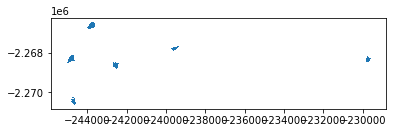

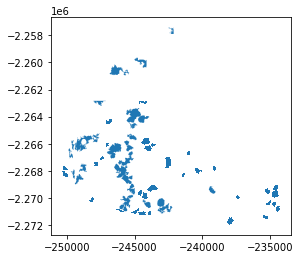

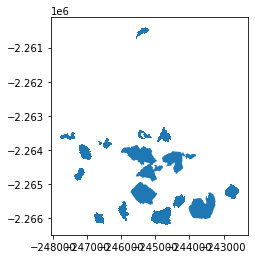

In [270]:
# %%timeit -n 1 -r 1
# 3min 17s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
# gdf=None
gdf = build_gdf.xarray_to_gdf(ds)

date
2010-08-14 15:35:06    AxesSubplot(0.125,0.414494;0.775x0.176013)
2012-06-29 15:26:27    AxesSubplot(0.125,0.219788;0.775x0.565425)
2016-09-03 15:46:32    AxesSubplot(0.125,0.262101;0.775x0.480798)
Name: berg_poly, dtype: object

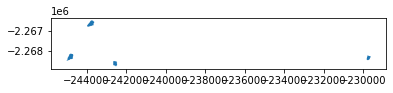

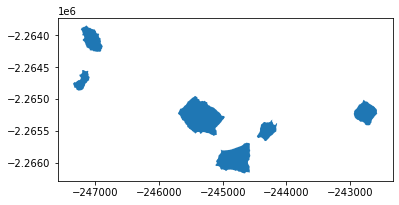

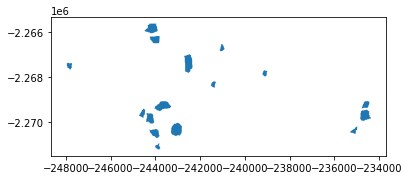

In [272]:
# gdf.loc[((gdf['sl_adjust']>4.27) & (gdf['sl_adjust']<4.36))].groupby('date').berg_poly.plot()
gdf.groupby('date').berg_poly.plot()

In [225]:
import dask.array as da
import dask

In [226]:
a = da.from_array([[0, 1, 2],[3,4,5],[6,7,8]], chunks=2)
print(a.compute())
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
dask.array<array, shape=(3, 3), dtype=int64, chunksize=(2, 2), chunktype=numpy.ndarray>


In [229]:
x = []
def f(b):
    print(b)
    trylist = list(sum(y) for y in b)
    print(trylist)
    x.append(trylist)
#     print(x)
    
#     return trylist

z = da.blockwise(f, '', a, 'ij', meta=pd.DataFrame({'c':[]}), concatenate=True)

In [230]:
out = z.compute()
print(out)
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[3, 12, 21]
None
[[3, 12, 21]]


In [240]:
# x = []
@dask.delayed
def f(b):
    print(b)
    trylist = list(sum(y) for y in b)
    print(trylist)
#     x.append(trylist)
#     print(x)
    
    return trylist

# z = da.blockwise(f, '', a, 'ij', meta=pd.DataFrame({'c':[]}), concatenate=True)

In [243]:
z = dask.compute([f(w) for w in a.to_delayed().ravel()])[0]
# out = z.compute()
# print(out)
print(z)

[[0 1]
 [3 4]][[2]
 [5]]
[1, 7]
[[6 7]]
[13]
[[8]]
[8]

[2, 5]
[[1, 7], [2, 5], [13], [8]]


In [185]:
outlist = []
for v in out:
    outlist.append(v)
# outlist = [outlist.append(v[:]) for v in out]
print(outlist)

[array([ 2,  3, 14, 15]), array([ 8,  9, 14, 15])]


In [136]:
[print(v) for v in out]

[ 2  3 14 15]
[ 8  9 14 15]


[None, None]

1


In [ ]:
# This requires geoviews be installed, and their install pages have warning if your environment uses conda-forge
# libraries and it won't resolve the environment with a conda install, so I'll need to create a new test env to try this
# bergs = gdf.hvplot()
# bergs

In [ ]:
# scrolldems*bergs

In [279]:
gdf

DEMarray  sl_adjust  \
0   [12.886615753173828, 12.642784118652344, 12.41...   6.527096   
1   [9.819225311279297, 12.478382110595703, 12.314...   7.060342   
2   [5.405936241149903, 5.307398796081544, 5.60445...   6.495207   
3   [6.190916061401368, 6.2835330963134775, 5.9900...   7.485034   
4   [20.02866554260254, 19.543371200561523, 18.864...   4.967831   
5   [13.496315002441406, 13.537185668945312, 13.62...   5.521208   
6   [8.008923530578613, 8.28868579864502, 8.864991...   6.234544   
7   [8.032073974609375, 8.97415542602539, 9.376052...   6.766779   
8   [22.503093719482422, 24.182273864746094, 24.50...   5.339808   
9   [16.21750545501709, 15.677023887634277, 15.646...   5.722640   
10  [16.600048065185547, 17.152462005615234, 17.66...   5.498614   
11  [16.92466640472412, 17.347933769226074, 17.596...   4.884544   
12  [13.77397346496582, 13.125741958618164, 11.955...   4.991948   
13  [22.714134216308594, 22.334327697753906, 22.35...   5.558764   
14  [10.189348220825195, 10.017210006713867, 10.10...   5.174832   
15  [16.54963207244873, 17.223856925964355, 17.484...   5.150123   
16  [11.280265808105469, 11.59783935546875, 11.646...   4.797705   
17  [7.436346054077149, 8.282289505004883, 7.62232...   6.491677   
18  [11.24433708190918, 11.025041580200195, 11.635...   6.474549   
19  [18.010254859924316, 17.679421424865723, 17.33...   6.252077   
20  [26.887701988220215, 26.462454795837402, 26.06...   4.766566   
21  [21.8305721282959, 21.722745895385742, 21.8162...   4.929153   
22  [24.08277702331543, 22.950403213500977, 22.924...  -0.139389   
23  [18.162883758544922, 18.666057586669922, 19.08...   3.809671   
24  [14.109066009521484, 14.049812316894531, 13.80...  -0.558146   
25  [21.26131820678711, 21.05898666381836, 20.6907...   2.463220   

                                            berg_poly fjord  \
0   POLYGON ((-243974.000 -2266723.337, -243974.00...    JI   
1   POLYGON ((-229826.000 -2268428.102, -229826.04...    JI   
2   POLYGON ((-245020.804 -2268491.000, -245019.85...    JI   
3   POLYGON ((-242656.000 -2268511.069, -242655.80...    JI   
4   POLYGON ((-244487.266 -2265928.937, -244486.36...    JI   
5   POLYGON ((-244249.611 -2266322.160, -244250.36...    JI   
6   POLYGON ((-241117.820 -2266782.283, -241117.52...    JI   
7   POLYGON ((-247932.000 -2267521.337, -247932.00...    JI   
8   POLYGON ((-242647.000 -2267750.659, -242648.09...    JI   
9   POLYGON ((-239209.686 -2267850.000, -239209.52...    JI   
10  POLYGON ((-241512.120 -2268367.878, -241512.38...    JI   
11  POLYGON ((-234760.686 -2269344.893, -234759.85...    JI   
12  POLYGON ((-244020.663 -2269414.000, -244030.00...    JI   
13  POLYGON ((-244741.000 -2269712.659, -244742.09...    JI   
14  POLYGON ((-234826.014 -2269871.716, -234826.09...    JI   
15  POLYGON ((-244398.907 -2269996.907, -244399.85...    JI   
16  POLYGON ((-235263.639 -2270476.099, -235264.36...    JI   
17  POLYGON ((-244241.549 -2270323.831, -244241.61...    JI   
18  POLYGON ((-243300.000 -2270417.337, -243300.00...    JI   
19  POLYGON ((-244002.000 -2271123.337, -244002.00...    JI   
20  POLYGON ((-247214.907 -2263922.907, -247215.85...    JI   
21  POLYGON ((-247354.108 -2264755.108, -247352.34...    JI   
22  POLYGON ((-242939.266 -2265243.063, -242939.52...    JI   
23  POLYGON ((-245662.000 -2265276.040, -245662.00...    JI   
24  POLYGON ((-244448.907 -2265606.907, -244449.63...    JI   
25  POLYGON ((-245118.552 -2266040.772, -245117.85...    JI   

                  date  tidal_ht_offset  tidal_ht_min  tidal_ht_max  \
0  2010-08-14 15:35:06         0.738320     -1.038866      0.887763   
1  2010-08-14 15:35:06         0.738320     -1.038866      0.887763   
2  2010-08-14 15:35:06         0.738320     -1.038866      0.887763   
3  2010-08-14 15:35:06         0.738320     -1.038866      0.887763   
4  2016-09-03 15:46:32         0.265173     -0.980227      1.001632   
5  2016-09-03 15:46:32         0.265173     -0.980227      1.001632   
6  2016-0

## Compute Water Depths on Icebergs

In [274]:
gdf.berggdf.calc_filt_draft()

In [275]:
gdf.berggdf.calc_rowwise_medmaxmad('filtered_draft')

In [276]:
gdf.berggdf.wat_depth_uncert('filtered_draft')

In [ ]:
# def mmm(vals): # mmm = min, med, max
#     print(np.nanmin(vals))
#     print(np.nanmedian(vals))
#     print(np.nanmax(vals))

## Extract measured values from BedMachine v3 and IBCAOv4 (where available)
All bathymetry values from these gridded products are included, then later parsed into bathymetric observations and inferred (from e.g. gravimetry, modeling) for comparing with iceberg-inferred water depths.

Note that the datasets are subset to the region of the fjord outside this script to reduce memory requirements during processing.

***Improvement: add CRS handling/checks to catch when a measurement dataset is incompatible and needs to be reprojected***

#### BedMachine Greenland

In [277]:
# measfile='/Users/jessica/mapping/datasets/160281892/BedMachineGreenland-2017-09-20.nc'
measfile='/Users/jessica/mapping/datasets/160281892/BedMachineGreenland-2017-09-20_3413_'+ds.attrs['fjord']+'.nc'
# measfile='/home/jovyan/icebath/notebooks/supporting_docs/160281892/BedMachineGreenland-2017-09-20.nc'
# measfile='/home/jovyan/icebath/notebooks/supporting_docs/160281892/BedMachineGreenland-2017-09-20_'+ds.attrs['fjord']+'.nc'

In [278]:
gdf.berggdf.get_meas_wat_depth(ds, measfile, 
                               vardict={"bed":"bmach_bed", "errbed":"bmach_errbed", "source":"bmach_source"},
                               nanval=-9999)

Note that the new file is reprojected to have the same CRS as the dataset to which it is being added.        However, if the two CRSs are compatible, the spatial properties of the new file may be added to or overwrite the ones of the existing dataset


Note that the new file is reprojected to have the same CRS as the dataset to which it is being added.        However, if the two CRSs are compatible, the spatial properties of the new file may be added to or overwrite the ones of the existing dataset


Note that the new file is reprojected to have the same CRS as the dataset to which it is being added.        However, if the two CRSs are compatible, the spatial properties of the new file may be added to or overwrite the ones of the existing dataset


In [ ]:
bds = (-243983.8540184634, -2266766.2287146077, -243610.84332808948, -2266448.7114776378)

In [ ]:
subset_raster = ds.rio.clip_box(-244983.8540184634, -2276966.2287146077, -243010.84332808948, -2266048.7114776378, auto_expand=True, auto_expand_limit=15)

In [ ]:
ds.sel({"x":-243983.8540184634}, method="nearest")

In [ ]:
%matplotlib inline
ds.bmach_bed.plot()

In [ ]:
ds

#### IBCAOv4
https://www.gebco.net/data_and_products/gridded_bathymetry_data/arctic_ocean/

Source keys: https://www.gebco.net/data_and_products/gridded_bathymetry_data/gebco_2020/

Downloaded Feb 2021

**NOTE** IBCAO has it's own Polar Stereo projection (EPSG:3996: WGS 84/IBCAO Polar Stereographic) so it needs to be reprojected before being applied to these datasets.
See: https://spatialreference.org/ref/?search=Polar+Stereographic

In [280]:
# measfile2a='/Users/jessica/mapping/datasets/IBCAO_v4_200m_ice_3413.nc'
measfile2a='/Users/jessica/mapping/datasets/IBCAO_v4_200m_ice_3413_'+ds.attrs['fjord']+'.nc'
# measfile2a='/home/jovyan/icebath/notebooks/supporting_docs/IBCAO_v4_200m_ice_3413.nc'
# measfile2a='/home/jovyan/icebath/notebooks/supporting_docs/IBCAO_v4_200m_ice_3413_'+ds.attrs['fjord']+'.nc'
measfile2b='/Users/jessica/mapping/datasets/IBCAO_v4_200m_TID_3413.nc'
# measfile2b='/home/jovyan/icebath/notebooks/supporting_docs/IBCAO_v4_200m_TID_3413.nc'

In [282]:
gdf.berggdf.get_meas_wat_depth(ds, measfile2a, 
                               vardict={"z":"ibcao_bed"}) # no associated uncertainties
gdf.berggdf.get_meas_wat_depth(ds, measfile2b, 
                               vardict={"z":"ibcao_source"})

Note that the new file is reprojected to have the same CRS as the dataset to which it is being added.        However, if the two CRSs are compatible, the spatial properties of the new file may be added to or overwrite the ones of the existing dataset


In [283]:
gdf #[gdf['date'].dt.year.astype(int)==2016]

DEMarray  sl_adjust  \
0   [12.886615753173828, 12.642784118652344, 12.41...   6.527096   
1   [9.819225311279297, 12.478382110595703, 12.314...   7.060342   
2   [5.405936241149903, 5.307398796081544, 5.60445...   6.495207   
3   [6.190916061401368, 6.2835330963134775, 5.9900...   7.485034   
4   [20.02866554260254, 19.543371200561523, 18.864...   4.967831   
5   [13.496315002441406, 13.537185668945312, 13.62...   5.521208   
6   [8.008923530578613, 8.28868579864502, 8.864991...   6.234544   
7   [8.032073974609375, 8.97415542602539, 9.376052...   6.766779   
8   [22.503093719482422, 24.182273864746094, 24.50...   5.339808   
9   [16.21750545501709, 15.677023887634277, 15.646...   5.722640   
10  [16.600048065185547, 17.152462005615234, 17.66...   5.498614   
11  [16.92466640472412, 17.347933769226074, 17.596...   4.884544   
12  [13.77397346496582, 13.125741958618164, 11.955...   4.991948   
13  [22.714134216308594, 22.334327697753906, 22.35...   5.558764   
14  [10.189348220825195, 10.017210006713867, 10.10...   5.174832   
15  [16.54963207244873, 17.223856925964355, 17.484...   5.150123   
16  [11.280265808105469, 11.59783935546875, 11.646...   4.797705   
17  [7.436346054077149, 8.282289505004883, 7.62232...   6.491677   
18  [11.24433708190918, 11.025041580200195, 11.635...   6.474549   
19  [18.010254859924316, 17.679421424865723, 17.33...   6.252077   
20  [26.887701988220215, 26.462454795837402, 26.06...   4.766566   
21  [21.8305721282959, 21.722745895385742, 21.8162...   4.929153   
22  [24.08277702331543, 22.950403213500977, 22.924...  -0.139389   
23  [18.162883758544922, 18.666057586669922, 19.08...   3.809671   
24  [14.109066009521484, 14.049812316894531, 13.80...  -0.558146   
25  [21.26131820678711, 21.05898666381836, 20.6907...   2.463220   

                                            berg_poly fjord  \
0   POLYGON ((-243974.000 -2266723.337, -243974.00...    JI   
1   POLYGON ((-229826.000 -2268428.102, -229826.04...    JI   
2   POLYGON ((-245020.804 -2268491.000, -245019.85...    JI   
3   POLYGON ((-242656.000 -2268511.069, -242655.80...    JI   
4   POLYGON ((-244487.266 -2265928.937, -244486.36...    JI   
5   POLYGON ((-244249.611 -2266322.160, -244250.36...    JI   
6   POLYGON ((-241117.820 -2266782.283, -241117.52...    JI   
7   POLYGON ((-247932.000 -2267521.337, -247932.00...    JI   
8   POLYGON ((-242647.000 -2267750.659, -242648.09...    JI   
9   POLYGON ((-239209.686 -2267850.000, -239209.52...    JI   
10  POLYGON ((-241512.120 -2268367.878, -241512.38...    JI   
11  POLYGON ((-234760.686 -2269344.893, -234759.85...    JI   
12  POLYGON ((-244020.663 -2269414.000, -244030.00...    JI   
13  POLYGON ((-244741.000 -2269712.659, -244742.09...    JI   
14  POLYGON ((-234826.014 -2269871.716, -234826.09...    JI   
15  POLYGON ((-244398.907 -2269996.907, -244399.85...    JI   
16  POLYGON ((-235263.639 -2270476.099, -235264.36...    JI   
17  POLYGON ((-244241.549 -2270323.831, -244241.61...    JI   
18  POLYGON ((-243300.000 -2270417.337, -243300.00...    JI   
19  POLYGON ((-244002.000 -2271123.337, -244002.00...    JI   
20  POLYGON ((-247214.907 -2263922.907, -247215.85...    JI   
21  POLYGON ((-247354.108 -2264755.108, -247352.34...    JI   
22  POLYGON ((-242939.266 -2265243.063, -242939.52...    JI   
23  POLYGON ((-245662.000 -2265276.040, -245662.00...    JI   
24  POLYGON ((-244448.907 -2265606.907, -244449.63...    JI   
25  POLYGON ((-245118.552 -2266040.772, -245117.85...    JI   

                  date  tidal_ht_offset  tidal_ht_min  tidal_ht_max  \
0  2010-08-14 15:35:06         0.738320     -1.038866      0.887763   
1  2010-08-14 15:35:06         0.738320     -1.038866      0.887763   
2  2010-08-14 15:35:06         0.738320     -1.038866      0.887763   
3  2010-08-14 15:35:06         0.738320     -1.038866      0.887763   
4  2016-09-03 15:46:32         0.265173     -0.980227      1.001632   
5  2016-09-03 15:46:32         0.265173     -0.980227      1.001632   
6  2016-0

### Plot the measured and inferred values
Plots the measured and inferred values for all icebergs that have bathymetric measurements available via BedMachine

In [284]:
from icebath.utils import plot as ibplot

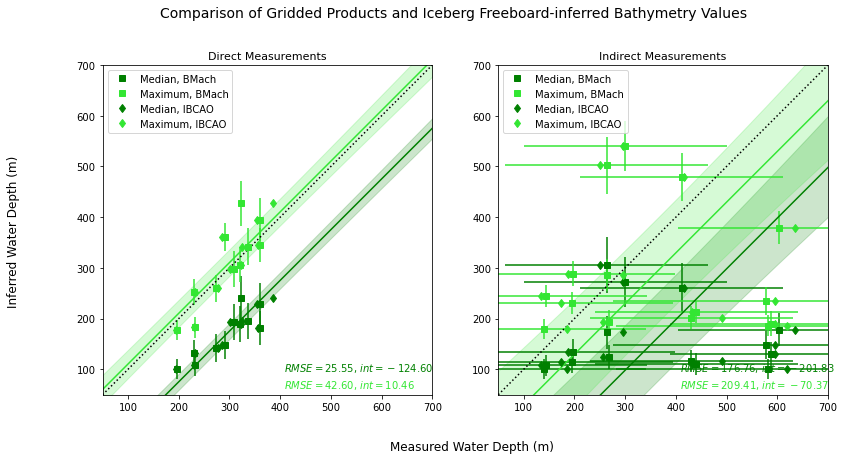

In [285]:
ibplot.meas_vs_infer_fig(gdf, save=False)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
%matplotlib inline

In [ ]:
ds

In [ ]:
from scipy.interpolate import griddata

In [ ]:
all_bathy.x[0:10]

In [ ]:
x = np.arange(5, 8, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y)

print(len(x))
print(len(y))
print(len(xx))
print(len(yy))
print(x)
print(xx)
print(y)
print(yy)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)
plt.show()


In [ ]:
# xi = np.linspace(int(all_bathy.x.min().item()), int(all_bathy.x.max().item()), int(abs((int(all_bathy.x.min().item())-int(all_bathy.x.min().item())/2))))
res = 2
xmin = all_bathy.x.min().item()
xmax = all_bathy.x.max().item()
xi = np.linspace(xmin, xmax, int(np.round(abs((xmin-xmax)/res))+res/2))
print(len(xi))
ymin = all_bathy.y.min().item()
ymax = all_bathy.y.max().item()
yi = np.linspace(ymax, ymin, int(np.round(abs((ymin-ymax)/res))+res/2))
print(len(yi))
print(np.shape(xi))
print(np.shape(yi))
xi,yi = np.meshgrid(xi, yi)
print(len(xi))
print(len(yi))
print(np.shape(xi))
print(np.shape(yi))

# np.round(abs((int(all_bathy.x.min().item())-int(all_bathy.x.min().item())/2)))

In [ ]:
all_bathy.values.flatten()

In [ ]:
obs = -ds.bmach_bed.where(ds.bmach_source>=10)
meas_only = obs.where(ds.land_mask==1, other=0)
all_bathy = ds.inf_bergs.where(~np.isnan(ds.inf_bergs), other=meas_only)

# xi = np.linspace(int(all_bathy.x.min().item()), int(all_bathy.x.max().item()), int(abs((int(all_bathy.x.min().item())-int(all_bathy.x.min().item())/2))))
# yi = np.linspace(int(all_bathy.y.min().item()), int(all_bathy.y.max().item()), int(abs((int(all_bathy.y.min().item())-int(all_bathy.y.min().item())/2))))
# xi,yi = np.meshgrid(all_bathy.x, all_bathy.y)
print(len(xi))
print(len(yi))
print(len(all_bathy.x))
print(len(all_bathy.y))
print(np.shape([all_bathy.x.values, all_bathy.y.values]))
print(np.shape(all_bathy.values))

interp = griddata((xi.flatten(), yi.flatten()), all_bathy.values.flatten(), (xi, yi), method='linear')

print(type(interp))
plt.imshow(interp, cmap=bathy_cmap)
# all_bathy.plot.imshow(cmap=bathy_cmap)

In [ ]:
Ideas to speed it up but still interpolate:
    - lower resolution for output
    - limit interpolation to area where data is being added (probably a good thing to do for plotting anyway;
                                                            could create a sub-dataset of the area that has new data)
    - find another method (or chunk it)? Since this one crashed the kernel...

In [ ]:
ds.inf_bergs.fillna(0.0).plot.imshow()

In [ ]:
loc = ['Ilulissat Isfjord']
letters=['a','b']
plot_title = 'Comparison of Measured and Inferred Bathymetry Values'

plt.close(fig)

fig, axes = plt.subplots(1,2, figsize=(12,5)) #8,3

#define range of colors for plotting
v=np.linspace(0,600,13)
bathy_cmap = LinearSegmentedColormap.from_list('bathy_cmap', [(0.85,0.9,0.98),(0,0,.5)], 12)   #plt.cm.Blues

# left plot (contours from measurements only)
obs = -ds.bmach_bed.where(ds.bmach_source>=10)
meas_only = obs.where(ds.land_mask==1, other=0)
CS = xr.plot.contour(meas_only, x='x', y='y', ax=axes[0], linewidths=0.3, colors=[(0.95,0.95,0.95)], add_labels=False)
CS = xr.plot.contourf(meas_only, x='x', y='y', ax=axes[0], levels=v, cmap=bathy_cmap, add_labels=False)

In [ ]:
# add iceberg-inferred depths to xarray (ds) as a raster layer
from geocube.api.core import make_geocube

gdf["geometry"] = gdf.geometry
inf_bergs = make_geocube(vector_data=gdf,
                         measurements=['filtered_draft_med'],
                         like=ds,
                         fill=np.nan
                        )

ds["inf_bergs"] = inf_bergs.filtered_draft_med

In [ ]:
# right plot: contours from inferred points and measured points
# Note: currently this uses the iceberg-inferred water depth for the entire area of the iceberg, rather than a single point
all_bathy = ds.inf_bergs.where(~np.isnan(ds.inf_bergs), other=meas_only)
CS2 = xr.plot.contour(all_bathy, x='x', y='y', ax=axes[1], linewidths=0.3, colors=[(0.95,0.95,0.95)], add_labels=False)
CS2 = xr.plot.contourf(all_bathy, x='x', y='y', ax=axes[1], levels=v, cmap=bathy_cmap, add_labels=False)

In [ ]:
# add land and measured bathymetry extent
# plot formatting
landcmap = LinearSegmentedColormap.from_list('land_cmap', [(0.65,0.45,0.35,1),(1,1,1,0)], 2)

for n in range(0,2):
    land = ds.land_mask.fillna(0.0).plot.imshow(x='x', y='y', ax=axes[n], cmap=landcmap, zorder=30, add_labels=False)
    land.colorbar.remove()
    xr.plot.contour(ds.bmach_source, x='x', y='y', ax=axes[n], levels=[0,10,100], linewidths=1, colors='black', add_labels=False)
    
    axes[n].axis('equal')
#     axes[n].set_ylim(ymin,ymax)
#     axes[n].set_xlim(xmin,xmax)

In [ ]:
# update plot labels, etc.
CS.colorbar.remove()
# CS2.colorbar.remove()

#turn off y axis labels
axes[1].yaxis.set_ticklabels([])

#label each plot
axes[0].set_title('measured', fontsize=11)
axes[0].text(0.02, 0.95, letters[0], weight='bold', transform=axes[0].transAxes, zorder=10)
axes[1].set_title('measured+inferred', fontsize=11)
axes[1].text(0.02, 0.95, letters[1], weight='bold', transform=axes[1].transAxes, zorder=10)

fig.text(0.5, 0.03,'Easting (m)', ha='center', va='center', fontsize=12)
fig.text(0.03, 0.5,'Northing (m)', ha='center', va='center', rotation='vertical', fontsize=12)

plt.suptitle('Bathymetry Contours', fontsize=14)
fig.subplots_adjust(hspace=0.3, wspace = 0.14, top=0.87, left=0.14, right=0.87, bottom=0.1)


In [ ]:
fig

In [ ]:
# NEXT STEPS:
# try doing this in holoviews to see if it is faster (especially to layer the plots) --> not at first attempt
# fix the 0/nodata issue so that it uses the available data to contour where possible (but doesn't contour to 0)
# move this plot creation into plot.py and just run it here to get the output

## Export the iceberg outlines and data to a shapefile

In [ ]:
shpgdf = gdf.copy(deep=True)
shpgdf['year'] = shpgdf['date'].dt.year.astype(int)

del shpgdf['date']
del shpgdf['DEMarray']
del shpgdf['filtered_draft']

# NOTE: need to rename columns due to name length limits for shapefile; otherwise,
# all ended up as "filtered_#"

shpgdf.to_file("/Users/jessica/projects/bathymetry_from_bergs/prelim_results/icebergs_JI.shp")

## Export the iceberg outlines and data to a geopackage

In [ ]:
shpgdf = gdf.copy(deep=True)
# shpgdf['year'] = shpgdf['date'].dt.year.astype(int)

# del shpgdf['date']
# del shpgdf['DEMarray']
# del shpgdf['filtered_draft']

# NOTE: need to rename columns due to name length limits for shapefile; otherwise,
# all ended up as "filtered_#"

shpgdf.to_file("/Users/jessica/projects/bathymetry_from_bergs/prelim_results/icebergs_JI.gpkg", driver="GPKG")

## Visualize the range of elevation (area) values for a single iceberg (DEM)

In [ ]:
vals = gdf[gdf['date'].dt.year.astype(int)==2016].geometry.area

In [ ]:
axHist = plt.subplot()

_ = axHist.hist(vals, np.arange(50000,300000,25000), color="silver")

axHist.set_xlabel('Elevation (m)')
axHist.set_ylabel('Count')
axHist.set_title('DEM Pixel Elevations')

plt.show()

## Visualizing Iceberg Outlines for a Single DEM
Some attempts at doing this with Holoviews, including to try and have it with a slider bar, are in the misc_dev_notes_notebook, as is code for plotting a histogram of iceberg areas (originally meant to be part of the below plot and not updated to be independent)

In [ ]:
timei=1
print(ds['dtime'].isel({'dtime':timei}))
dem = ds.isel({'dtime':timei})

In [ ]:
im = dem.elevation.values

In [ ]:
# Plot objectives: show DEM, land mask, iceberg outlines. 2nd plot with just orig DEM?
fig = plt.figure(figsize=(12,12)) # width, height in inches
# gs = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)
gs=fig.add_gridspec(3,1, hspace=0.3) # nrows, ncols

# DEM plot
axDEM = plt.subplot(gs[0:2,0])
dem.elevation.plot.pcolormesh(ax=axDEM, 
                              vmin=-10, vmax=75, cmap='magma', # vmin and vmax set the colorbar limits here
                              xscale='linear', yscale='linear',
                              cbar_kwargs={'label':"Elevation (m amsl)"})

# land mask
landcm = mpl.colors.ListedColormap([(0.5, 0.35, 0.35, 1.), (0.5, 0., 0.6, 0)])
dem.land_mask.plot(ax=axDEM, cmap=landcm, add_colorbar=False)

# iceberg contours - ultimately add this from geodataframe
# dem.elevation.plot.contour(ax=axDEM, levels=[threshold], colors=['gray'])
# Note: dem.elevation.plot.contour(levels=[threshold], colors=['gray']) will show the plot, but you can't
# add it to these axes and then show it inline from a second cell
# I'm not entirely sure this is plotting what I think; it's also not actually plotting the contoured data 
gdf.loc[gdf['date']==ds.dtime.isel({'dtime':timei}).values].berg_poly.plot(ax=axDEM,
                                                                          linestyle='-',
                                                                          linewidth=2,
                                                                          edgecolor='gray',
                                                                          facecolor=(0,0,0,0))


xmin = -250000
xmax = -232750
ymin = -2268250
ymax = -2251000
# xmin = -235000 #zoom in to figure out empty iceberg DEM during gdf generation
# xmax = -233000
# ymin = -2257500
# ymax = -2255000
while (xmin-xmax) != (ymin-ymax):
    print("modify your x and y min/max to make the areas equal")
    break
    
axDEM.set_aspect('equal')
axDEM.set_xlim(xmin, xmax)
axDEM.set_ylim(ymin, ymax)

axDEM.set_xlabel("x (km)")
axDEM.set_ylabel("y (km)")


plt.show()

In [ ]:
# Note: gdf['date']==timei is returning all false, so the datetimes will need to be dealt with to get the areas from the geometry column
# areas = gdf.loc[:, gdf['date']==timei].geometry.area()